### Import modules

In [13]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()

# Define study
STUDY_NAME = "opt_flathv_500_1000_withBB_chroma15_2p3_sol_tune_tune_2228"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/base_collider/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/base_collider/xtrack_0004/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False

### Load data

In [14]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df

normalized amplitude in xy-plane      qx      qy   
beam  qx     qy                                                         
lhcb1 62.305 60.309                             2.719  62.305  60.309  \
             60.310                             2.656  62.305  60.310   
             60.311                             2.875  62.305  60.311   
             60.312                             2.812  62.305  60.312   
             60.313                             2.812  62.305  60.313   
...                                               ...     ...     ...   
      62.323 60.328                             3.344  62.323  60.328   
             60.329                             3.062  62.323  60.329   
      62.324 60.328                             3.344  62.324  60.328   
             60.329                             3.094  62.324  60.329   
      62.325 60.329                             3.156  62.325  60.329   

                     i_bunch_b1  i_bunch_b2  num_particles_per_bunch  
beam  qx     qy                                                       
lhcb1 62.305 60.309      1147.0      1147.0             2.163072e+11  
             60.310      1147.0      1147.0             2.163072e+11  
             60.311      1147.0      1147.0             2.163072e+11  
             60.312      1147.0      1147.0             2.163072e+11  
             60.313      1147.0      1147.0             2.163072e+11  
...                         ...         ...                      ...  
      62.323 60.328      1147.0      1147.0             2.163072e+11  
             60.329      1147.0      1147.0             2.163072e+11  
      62.324 60.328      1147.0      1147.0             2.163072e+11  
             60.329      1147.0      1147.0             2.163072e+11  
      62.325 60.329      1147.0      1147.0             2.163072e+11  

[231 rows x 6 columns]

In [15]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,2.719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,2.656,2.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,2.875,2.844,2.844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,2.812,2.875,2.938,2.906,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,2.812,2.719,2.938,2.594,2.906,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,2.719,2.781,2.781,2.906,3.156,3.438,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,2.656,2.688,2.781,3.156,3.062,3.250,4.062,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,3.031,2.656,2.656,2.938,3.156,3.594,4.375,4.406,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,2.781,2.719,2.688,2.844,3.125,3.094,4.812,4.719,4.656,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

### Plot heatmap for tune-tune scan

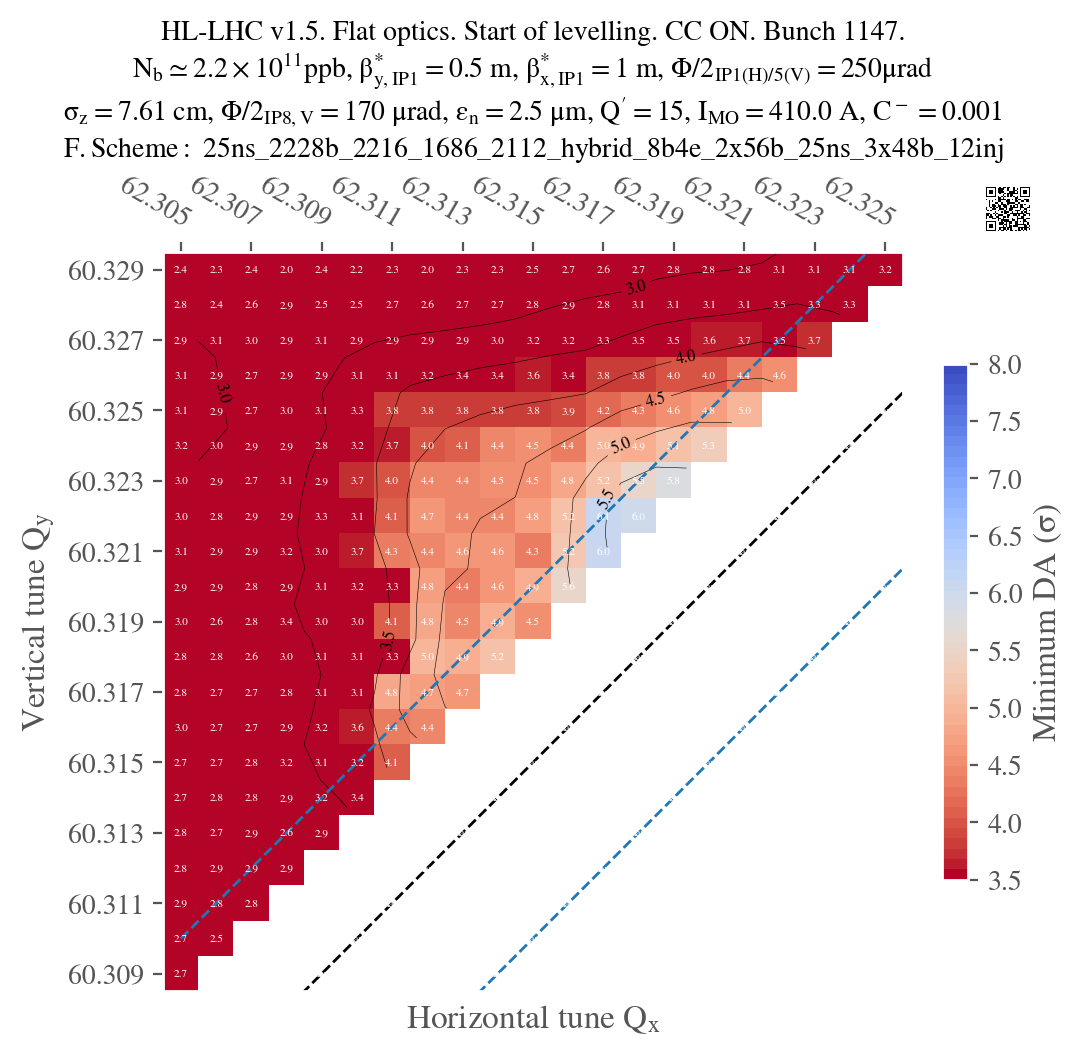

In [17]:
analysis_functions.plot_heatmap(df_to_plot, STUDY_NAME, link="https://cernbox.cern.ch/s/kmeywIKIaJMTMKk", plot_contours=True, conf_mad=conf_mad, conf_collider=conf_collider)

### Save study on EOS

In [18]:
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)